# Implementing a simple net with 1 hidden layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import to_categorical
np.random.seed(1671)
import pydotplus
from ipywidgets import Image
from io import StringIO

/Users/tari/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
RESHAPED = 784

In [5]:
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
X_train /= 255
X_test /= 255

In [7]:
print(X_train.shape[0], ' training samples')
print(X_test.shape[0], ' testing samples')

60000  training samples
10000  testing samples


In [8]:
y_train = to_categorical(y_train, NB_CLASSES)
y_test = to_categorical(y_test, NB_CLASSES)

In [9]:
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape = (RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 2s 33us/step - loss: 1.3633 - acc: 0.6796 - val_loss: 0.8904 - val_acc: 0.8246
Epoch 2/200
48000/48000 [==============================] - 1s 31us/step - loss: 0.7913 - acc: 0.8272 - val_loss: 0.6572 - val_acc: 0.8546
Epoch 3/200
48000/48000 [==============================] - 1s 31us/step - loss: 0.6436 - acc: 0.8497 - val_loss: 0.5625 - val_acc: 0.8681
Epoch 4/200
48000/48000 [==============================] - 2s 36us/step - loss: 0.5717 - acc: 0.8602 - val_loss: 0.5098 - val_acc: 0.8765
Epoch 5/200
48000/48000 [==============================] - 2s 36us/step - loss: 0.5276 - acc: 0.8678 - val_loss: 0.4758 - val_acc: 0.8826
Epoch 6/200
48000/48000 [==============================] - 2s 47us/step - loss: 0.4973 - acc: 0.8726 - val_loss: 0.4515 - val_acc: 0.8866
Epoch 7/200
48000/48000 [==============================] - 2s 35us/step - loss: 0.4748 - acc: 0.8775 - val_loss: 0.4333 - 

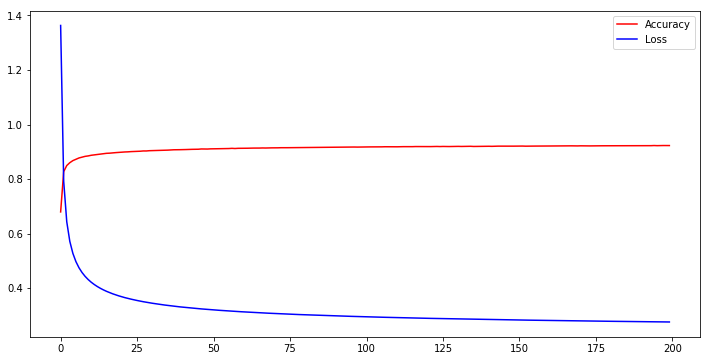

In [11]:
plt.figure(figsize=(12,6))
plt.plot(history.history['acc'], color = 'red', label = 'Accuracy' )
plt.plot(history.history['loss'], color = 'blue', label = 'Loss')
plt.legend()

In [12]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print('Test score {}'.format(score[0]))
print('Test accuracy {}'.format(score[1]))

10000/10000 [==============================] - 0s 40us/step
Test score 0.27738585036993024
Test accuracy 0.9227


# Visualisation 

In [13]:
import pydot, graphviz
from keras.utils import plot_model
plot_model(model, to_file='First_Net_Model.png', show_shapes=True)

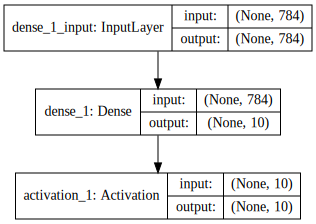

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))